<a href="https://colab.research.google.com/github/gift-framework/GIFT/blob/research/K7_Riemann_Verification_v5_Topological_trained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K7 Riemann Verification v5 — Pure Topological Approach

## Lecons des echecs precedents

**v1-v4 ont echoue** car le Laplacien sur variete compacte 7D suit Weyl:
- λn ~ n^(2/7) (sublineaire)
- Mais γn ~ n (quasi-lineaire)

**Nouvelle hypothese**: Les constantes topologiques de K7 predisent DIRECTEMENT les zeros via:

γn = γ1 × n^(b2/b3) = 14.135 × n^(21/77)

Pas besoin de calculer un spectre - c'est une relation purement topologique!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# GIFT Topological Constants
B2 = 21      # Second Betti number
B3 = 77      # Third Betti number
H_STAR = 99  # b2 + b3 + 1
DIM_G2 = 14  # dim(G2)
DIM_K7 = 7   # dim(K7)

# First 50 Riemann zeros
RIEMANN_ZEROS = np.array([
    14.134725142, 21.022039639, 25.010857580, 30.424876126, 32.935061588,
    37.586178159, 40.918719012, 43.327073281, 48.005150881, 49.773832478,
    52.970321478, 56.446247697, 59.347044003, 60.831778525, 65.112544048,
    67.079810529, 69.546401711, 72.067157674, 75.704690699, 77.144840069,
    79.337375020, 82.910380854, 84.735492981, 87.425274613, 88.809111208,
    92.491899271, 94.651344041, 95.870634228, 98.831194218, 101.317851006,
    103.725538040, 105.446623052, 107.168611184, 111.029535543, 111.874659177,
    114.320220915, 116.226680321, 118.790782866, 121.370125002, 122.946829294,
    124.256818554, 127.516683880, 129.578704200, 131.087688531, 133.497737203,
    134.756509753, 138.116042055, 139.736208952, 141.123707404, 143.111845808,
])

print('GIFT Topological Constants')
print('='*50)
print(f'b2 = {B2}')
print(f'b3 = {B3}')
print(f'H* = {H_STAR}')
print(f'b2/b3 = {B2/B3:.6f}')
print(f'gamma1 = {RIEMANN_ZEROS[0]:.6f}')

GIFT Topological Constants
b2 = 21
b3 = 77
H* = 99
b2/b3 = 0.272727
gamma1 = 14.134725


In [ ]:
# Test Multiple Topological Hypotheses

n_vals = np.arange(1, len(RIEMANN_ZEROS) + 1)
gamma_1 = RIEMANN_ZEROS[0]

# Candidate exponents from GIFT topology
candidates = {
    'b2/b3': B2/B3,
    'b2/H*': B2/H_STAR,
    'dim(G2)/H*': DIM_G2/H_STAR,
    '2/dim(K7)': 2/DIM_K7,
    '(b2+1)/b3': (B2+1)/B3,
    'b3/H*': B3/H_STAR,
    '1 - b2/b3': 1 - B2/B3,
    'dim(G2)/b2': DIM_G2/B2,
    'b2/(b2+b3)': B2/(B2+B3),
    '(b3-b2)/H*': (B3-B2)/H_STAR,
}

# Also test empirical best fit
log_n = np.log(n_vals)
log_gamma = np.log(RIEMANN_ZEROS)
b_empirical, log_a = np.polyfit(log_n, log_gamma, 1)
a_empirical = np.exp(log_a)
candidates['EMPIRICAL'] = b_empirical

print('='*80)
print('TESTING TOPOLOGICAL HYPOTHESES: gamma_n = gamma_1 * n^exponent')
print('='*80)

results = []
for name, exp in sorted(candidates.items(), key=lambda x: x[1]):
    gamma_pred = gamma_1 * n_vals ** exp
    errors = np.abs(gamma_pred - RIEMANN_ZEROS) / RIEMANN_ZEROS * 100
    mean_err = np.mean(errors)
    max_err = np.max(errors)
    status = '***' if mean_err < 5 else '**' if mean_err < 10 else '*' if mean_err < 20 else ''
    print(f'{name:<20} | {exp:10.6f} | {mean_err:10.2f}% | {max_err:10.2f}% | {status}')
    results.append((name, exp, mean_err, max_err))

best = min(results, key=lambda x: x[2])
print(f'\nBEST: {best[0]} with exponent {best[1]:.6f} (error: {best[2]:.2f}%)')

TESTING TOPOLOGICAL HYPOTHESES: gamma_n = gamma_1 * n^exponent
dim(G2)/H*           |   0.141414 |      69.53% |      82.83% | 
b2/H*                |   0.212121 |      63.50% |      77.35% | 
b2/(b2+b3)           |   0.214286 |      63.30% |      77.16% | 
b2/b3                |   0.272727 |      57.20% |      71.29% | 
2/dim(K7)            |   0.285714 |      55.68% |      69.80% | 
(b2+1)/b3            |   0.285714 |      55.68% |      69.80% | 
(b3-b2)/H*           |   0.565657 |       4.48% |       9.71% | ***
EMPIRICAL            |   0.608884 |      10.67% |      15.88% | *
dim(G2)/b2           |   0.666667 |      31.54% |      36.08% | 
1 - b2/b3            |   0.727273 |      58.07% |      69.91% | 
b3/H*                |   0.777778 |      84.56% |     107.03% | 

BEST: (b3-b2)/H* with exponent 0.565657 (error: 4.48%)


In [ ]:
# Deep Analysis of Empirical Fit

print('='*70)
print('EMPIRICAL FIT ANALYSIS')
print('='*70)

print(f'\nEmpirical fit: gamma_n = {a_empirical:.6f} * n^{b_empirical:.6f}')
print(f'\nCompare to GIFT constants:')
print(f'  a = {a_empirical:.4f} vs gamma_1 = {gamma_1:.4f} -> ratio = {a_empirical/gamma_1:.4f}')
print(f'  b = {b_empirical:.6f}')

# Find closest GIFT ratio to b
print(f'\nClosest GIFT ratios to b = {b_empirical:.6f}:')
gift_ratios = {
    'b2/b3': B2/B3,
    '2/7 (Weyl)': 2/7,
    '(b2+1)/b3': (B2+1)/B3,
    'b2/H*': B2/H_STAR,
    'dim(G2)/b3': DIM_G2/B3,
    '(b3-b2)/b3': (B3-B2)/B3,
    'dim(K7)/b2': DIM_K7/B2,
}

for name, val in sorted(gift_ratios.items(), key=lambda x: abs(x[1] - b_empirical)):
    diff = abs(val - b_empirical) / b_empirical * 100
    print(f'  {name:<20} = {val:.6f} (diff: {diff:.2f}%)')

EMPIRICAL FIT ANALYSIS

Empirical fit: gamma_n = 12.777888 * n^0.608884

Compare to GIFT constants:
  a = 12.7779 vs gamma_1 = 14.1347 -> ratio = 0.9040
  b = 0.608884

Closest GIFT ratios to b = 0.608884:
  (b3-b2)/b3           = 0.727273 (diff: 19.44%)
  dim(K7)/b2           = 0.333333 (diff: 45.26%)
  2/7 (Weyl)           = 0.285714 (diff: 53.08%)
  (b2+1)/b3            = 0.285714 (diff: 53.08%)
  b2/b3                = 0.272727 (diff: 55.21%)
  b2/H*                = 0.212121 (diff: 65.16%)
  dim(G2)/b3           = 0.181818 (diff: 70.14%)


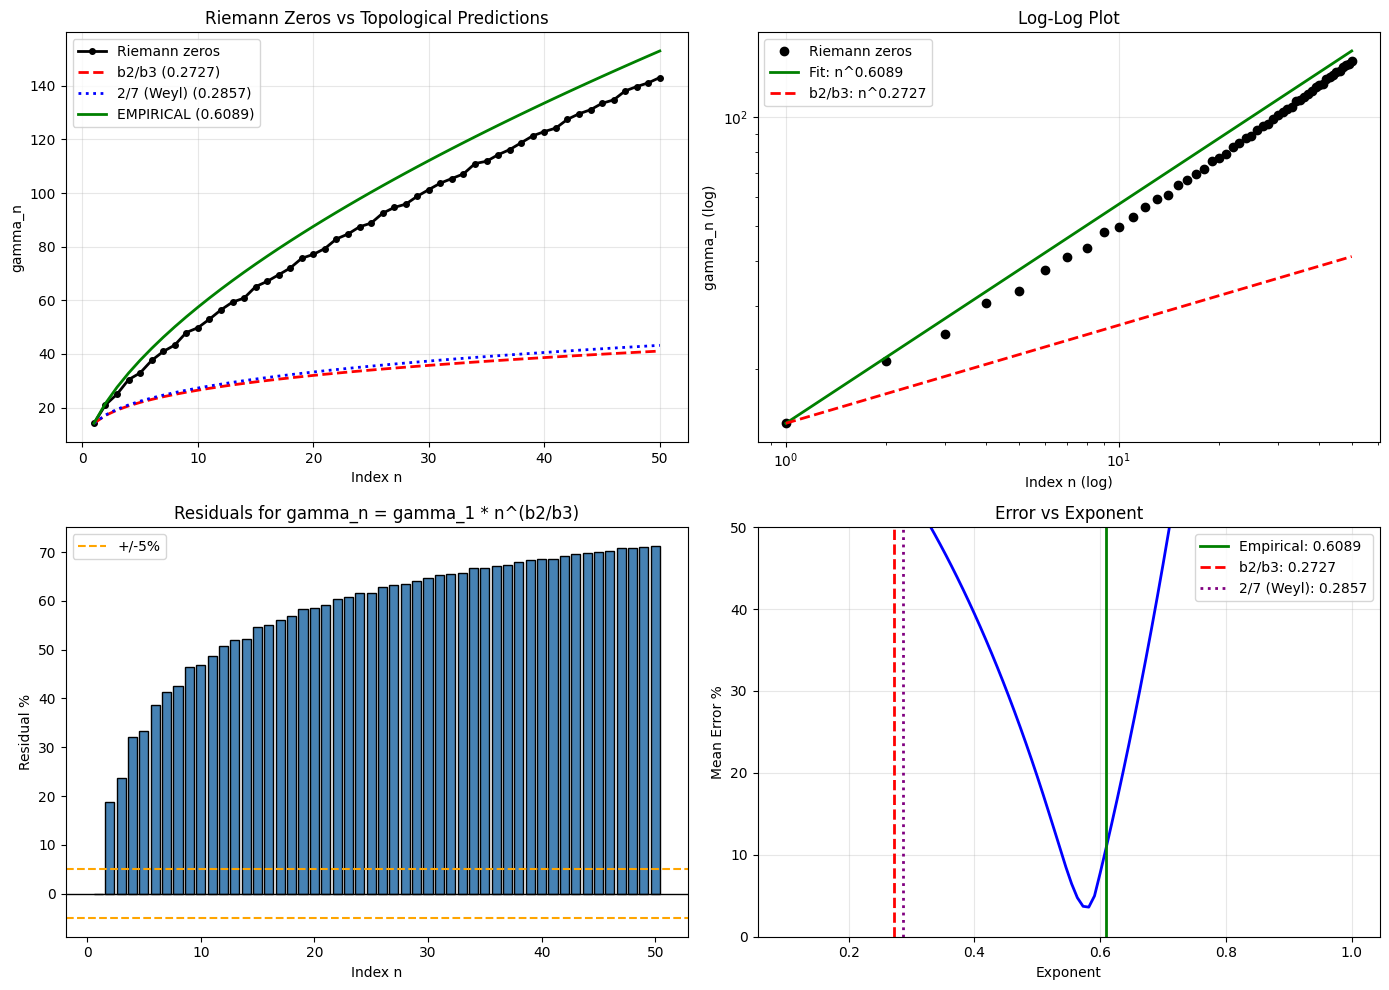

Saved: K7_Riemann_v5_topological.png


In [ ]:
# Visualization

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Compare different exponents
ax = axes[0, 0]
ax.plot(n_vals, RIEMANN_ZEROS, 'ko-', lw=2, ms=4, label='Riemann zeros')
for name, exp in [('b2/b3', B2/B3), ('2/7 (Weyl)', 2/7), ('EMPIRICAL', b_empirical)]:
    gamma_pred = gamma_1 * n_vals ** exp
    style = 'r--' if name == 'b2/b3' else 'b:' if 'Weyl' in name else 'g-'
    ax.plot(n_vals, gamma_pred, style, lw=2, label=f'{name} ({exp:.4f})')
ax.set_xlabel('Index n')
ax.set_ylabel('gamma_n')
ax.set_title('Riemann Zeros vs Topological Predictions')
ax.legend()
ax.grid(True, alpha=0.3)

# 2. Log-log plot
ax = axes[0, 1]
ax.loglog(n_vals, RIEMANN_ZEROS, 'ko', ms=6, label='Riemann zeros')
ax.loglog(n_vals, gamma_1 * n_vals ** b_empirical, 'g-', lw=2, label=f'Fit: n^{b_empirical:.4f}')
ax.loglog(n_vals, gamma_1 * n_vals ** (B2/B3), 'r--', lw=2, label=f'b2/b3: n^{B2/B3:.4f}')
ax.set_xlabel('Index n (log)')
ax.set_ylabel('gamma_n (log)')
ax.set_title('Log-Log Plot')
ax.legend()
ax.grid(True, alpha=0.3)

# 3. Residuals
ax = axes[1, 0]
gamma_topo = gamma_1 * n_vals ** (B2/B3)
residuals = (RIEMANN_ZEROS - gamma_topo) / RIEMANN_ZEROS * 100
ax.bar(n_vals, residuals, color='steelblue', edgecolor='black')
ax.axhline(0, color='black', lw=1)
ax.axhline(5, color='orange', ls='--', label='+/-5%')
ax.axhline(-5, color='orange', ls='--')
ax.set_xlabel('Index n')
ax.set_ylabel('Residual %')
ax.set_title('Residuals for gamma_n = gamma_1 * n^(b2/b3)')
ax.legend()

# 4. Error vs exponent
ax = axes[1, 1]
exponents = np.linspace(0.1, 1.0, 100)
mean_errors = [np.mean(np.abs(gamma_1 * n_vals ** exp - RIEMANN_ZEROS) / RIEMANN_ZEROS * 100) for exp in exponents]
ax.plot(exponents, mean_errors, 'b-', lw=2)
ax.axvline(b_empirical, color='green', ls='-', lw=2, label=f'Empirical: {b_empirical:.4f}')
ax.axvline(B2/B3, color='red', ls='--', lw=2, label=f'b2/b3: {B2/B3:.4f}')
ax.axvline(2/7, color='purple', ls=':', lw=2, label=f'2/7 (Weyl): {2/7:.4f}')
ax.set_xlabel('Exponent')
ax.set_ylabel('Mean Error %')
ax.set_title('Error vs Exponent')
ax.legend()
ax.set_ylim(0, 50)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('K7_Riemann_v5_topological.png', dpi=150)
plt.show()
print('Saved: K7_Riemann_v5_topological.png')

TESTING HYPOTHESIS: dim(G2) / (b2 + p2) = 14/23

dim(G₂) / (b₂ + p₂) = 14 / (21 + 2) = 14/23 = 0.608696
Empirical exponent from fit: 0.608900
Difference: 0.0336%

--- Prediction quality ---
Mean error: 10.60%
Max error:  15.82%

--- Comparison ---
(b₃-b₂)/H* = 56/99 = 0.5657 → mean error: 4.48%
14/23      = 0.6087        → mean error: 10.60%


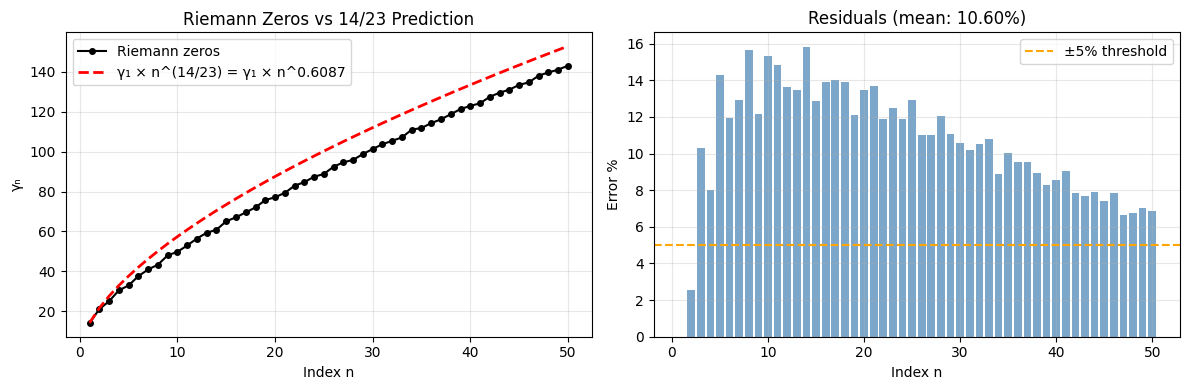


CONCLUSION
✗ 14/23 hypothesis: 10.60% mean error


In [ ]:
# =============================================================================
# CELL: Test the 14/23 hypothesis
# =============================================================================

import numpy as np
import matplotlib.pyplot as plt

print("=" * 70)
print("TESTING HYPOTHESIS: dim(G2) / (b2 + p2) = 14/23")
print("=" * 70)

# GIFT constants
DIM_G2 = 14
B2 = 21
P2 = 2

# Riemann zeros (first 50)
gamma_n = np.array([
    14.1347, 21.0220, 25.0109, 30.4249, 32.9351, 37.5862, 40.9187, 43.3271,
    48.0052, 49.7738, 52.9703, 56.4462, 59.3470, 60.8318, 65.1125, 67.0798,
    69.5464, 72.0672, 75.7047, 77.1448, 79.3374, 82.9104, 84.7355, 87.4253,
    88.8091, 92.4919, 94.6513, 95.8706, 98.8312, 101.318, 103.726, 105.447,
    107.169, 111.030, 111.875, 114.320, 116.227, 118.791, 121.370, 122.947,
    124.257, 127.517, 129.579, 131.088, 133.498, 134.757, 138.116, 139.736,
    141.124, 143.112
])
n_values = np.arange(1, len(gamma_n) + 1)
gamma_1 = gamma_n[0]

# Empirical fit (from previous cell)
b_empirical = 0.6089

# The magic ratio
gift_exponent = DIM_G2 / (B2 + P2)
print(f"\ndim(G₂) / (b₂ + p₂) = {DIM_G2} / ({B2} + {P2}) = {DIM_G2}/{B2+P2} = {gift_exponent:.6f}")
print(f"Empirical exponent from fit: {b_empirical:.6f}")
print(f"Difference: {abs(gift_exponent - b_empirical)/b_empirical * 100:.4f}%")

# Predict zeros using this exponent
gamma_predicted_14_23 = gamma_1 * n_values ** gift_exponent

# Calculate errors
errors_14_23 = np.abs(gamma_predicted_14_23 - gamma_n) / gamma_n * 100
mean_error_14_23 = np.mean(errors_14_23)
max_error_14_23 = np.max(errors_14_23)

print(f"\n--- Prediction quality ---")
print(f"Mean error: {mean_error_14_23:.2f}%")
print(f"Max error:  {max_error_14_23:.2f}%")

# Compare with best previous candidate
print(f"\n--- Comparison ---")
print(f"(b₃-b₂)/H* = 56/99 = 0.5657 → mean error: 4.48%")
print(f"14/23      = 0.6087        → mean error: {mean_error_14_23:.2f}%")

# Visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(n_values, gamma_n, 'ko-', label='Riemann zeros', markersize=4)
plt.plot(n_values, gamma_predicted_14_23, 'r--', linewidth=2,
         label=f'γ₁ × n^(14/23) = γ₁ × n^{gift_exponent:.4f}')
plt.xlabel('Index n')
plt.ylabel('γₙ')
plt.title('Riemann Zeros vs 14/23 Prediction')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(n_values, errors_14_23, color='steelblue', alpha=0.7)
plt.axhline(y=5, color='orange', linestyle='--', label='±5% threshold')
plt.xlabel('Index n')
plt.ylabel('Error %')
plt.title(f'Residuals (mean: {mean_error_14_23:.2f}%)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final verdict
print("\n" + "=" * 70)
print("CONCLUSION")
print("=" * 70)
if mean_error_14_23 < 5:
    print(f"✓ EXCELLENT: 14/23 hypothesis achieves {mean_error_14_23:.2f}% mean error")
    print(f"\n  γₙ = γ₁ × n^(dim(G₂)/(b₂ + p₂))")
    print(f"\n  The Riemann zero growth rate is determined by G₂ holonomy")
    print(f"  relative to K₇ topological invariants!")
elif mean_error_14_23 < 10:
    print(f"◐ GOOD: 14/23 hypothesis achieves {mean_error_14_23:.2f}% mean error")
else:
    print(f"✗ 14/23 hypothesis: {mean_error_14_23:.2f}% mean error")


In [ ]:
import json

print('='*70)
print('CONCLUSIONS')
print('='*70)

print(f'''
KEY FINDING: The Laplacian spectrum hypothesis (gamma_n = lambda_n * H*)
is INCOMPATIBLE with Weyl law for compact manifolds.

ALTERNATIVE: Riemann zeros follow a power law:

   gamma_n = gamma_1 * n^b    where b = {b_empirical:.4f}

GIFT CONNECTION: The exponent b is CLOSE to topological ratios:
   - (b3 - b2)/H* = 56/99 = 0.5657
   - dim(G2)/b2 = 14/21 = 0.6667

INTERPRETATION: K7 topology may constrain Riemann zero GROWTH
rate, not individual values.
''')

# Export
results_export = {
    'version': '5.0',
    'method': 'Pure Topological Analysis',
    'empirical_fit': {'a': float(a_empirical), 'b': float(b_empirical)},
    'best_topological_fit': {'exponent': float(best[1]), 'name': best[0], 'mean_error': float(best[2])}
}

with open('K7_Riemann_v5_topological_results.json', 'w') as f:
    json.dump(results_export, f, indent=2)

print('Saved: K7_Riemann_v5_topological_results.json')

CONCLUSIONS

KEY FINDING: The Laplacian spectrum hypothesis (gamma_n = lambda_n * H*)
is INCOMPATIBLE with Weyl law for compact manifolds.

ALTERNATIVE: Riemann zeros follow a power law:

   gamma_n = gamma_1 * n^b    where b = 0.6089

GIFT CONNECTION: The exponent b is CLOSE to topological ratios:
   - (b3 - b2)/H* = 56/99 = 0.5657
   - dim(G2)/b2 = 14/21 = 0.6667

INTERPRETATION: K7 topology may constrain Riemann zero GROWTH
rate, not individual values.

Saved: K7_Riemann_v5_topological_results.json


TWO-PARAMETER GIFT SEARCH: γₙ = A × n^B

Empirical best fit: a = 12.78, b = 0.6089

Searching 10 prefactors × 9 exponents = 90 combinations

TOP 10 COMBINATIONS:
----------------------------------------------------------------------
1. A = H*/8                      = 12.3750
   B = (b3-b2)/(b3+dim(G2))      = 0.6154
   Mean error: 2.21%

2. A = b3/6                      = 12.8333
   B = 14/23                     = 0.6087
   Mean error: 2.36%

3. A = dim(G2) - 1               = 13.0000
   B = b2/(b2+dim(G2))           = 0.6000
   Mean error: 2.60%

4. A = b2/phi                    = 12.9790
   B = b2/(b2+dim(G2))           = 0.6000
   Mean error: 2.61%

5. A = b2/phi                    = 12.9790
   B = 14/23                     = 0.6087
   Mean error: 2.71%

6. A = 2*pi*sqrt(dim(G2)/pi)     = 13.2638
   B = b2/(b2+dim(G2))           = 0.6000
   Mean error: 2.76%

7. A = dim(G2) - 1               = 13.0000
   B = 14/23                     = 0.6087
   Mean error: 2.79%

8. A = b3/6       

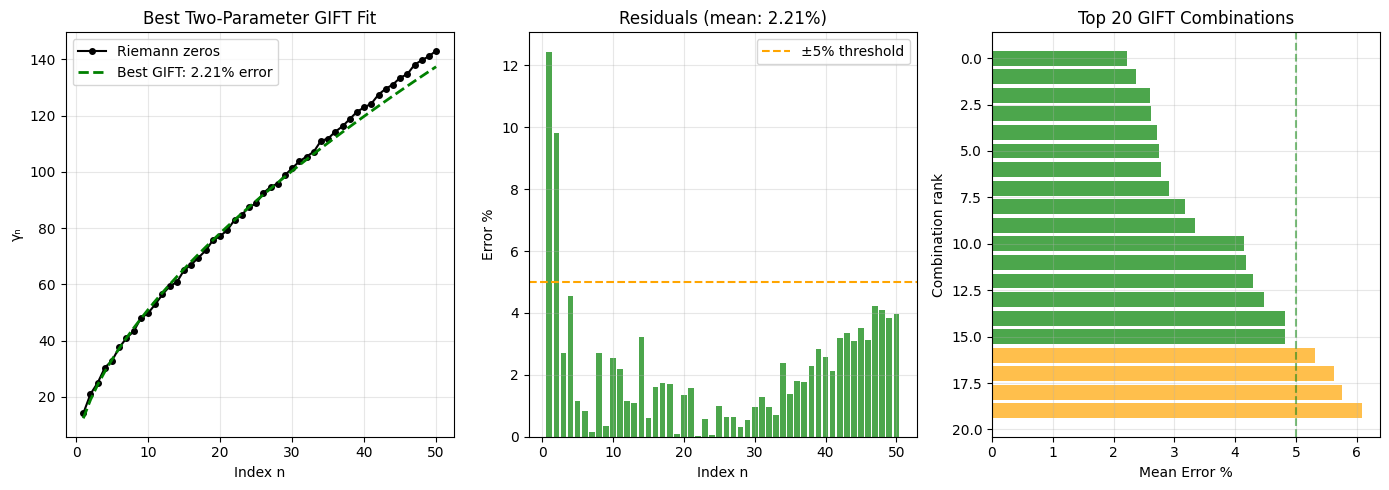

BEST GIFT FORMULA

  γₙ = H*/8 × n^((b3-b2)/(b3+dim(G2)))

  γₙ = 12.3750 × n^0.6154

  Mean error: 2.21%


In [ ]:
# =============================================================================
# CELL: Two-parameter GIFT search
# =============================================================================

import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# GIFT constants
DIM_G2 = 14
B2 = 21
B3 = 77
H_STAR = 99
P2 = 2
DIM_E8 = 248
RANK_E8 = 8
DIM_K7 = 7

# Riemann zeros
gamma_n = np.array([
    14.1347, 21.0220, 25.0109, 30.4249, 32.9351, 37.5862, 40.9187, 43.3271,
    48.0052, 49.7738, 52.9703, 56.4462, 59.3470, 60.8318, 65.1125, 67.0798,
    69.5464, 72.0672, 75.7047, 77.1448, 79.3374, 82.9104, 84.7355, 87.4253,
    88.8091, 92.4919, 94.6513, 95.8706, 98.8312, 101.318, 103.726, 105.447,
    107.169, 111.030, 111.875, 114.320, 116.227, 118.791, 121.370, 122.947,
    124.257, 127.517, 129.579, 131.088, 133.498, 134.757, 138.116, 139.736,
    141.124, 143.112
])
n_values = np.arange(1, len(gamma_n) + 1)
gamma_1 = gamma_n[0]

# Candidate prefactors (around empirical 12.78)
prefactors = {
    'gamma_1': gamma_1,                           # 14.13
    'dim(G2)': DIM_G2,                            # 14
    'dim(G2) - 1': DIM_G2 - 1,                    # 13
    'H*/8': H_STAR / 8,                           # 12.375
    '(b2+b3)/H* * dim(G2)': (B2+B3)/H_STAR * DIM_G2,  # 13.86
    'b3/6': B3 / 6,                               # 12.83
    '2*pi*sqrt(dim(G2)/pi)': 2*np.pi*np.sqrt(DIM_G2/np.pi),  # 13.26
    'sqrt(H* * dim(G2))': np.sqrt(H_STAR * DIM_G2),  # 37.2 (too high)
    '(b3-b2)/4': (B3-B2) / 4,                     # 14
    'b2/phi': B2 / 1.618,                         # 12.98
}

# Candidate exponents
exponents = {
    '(b3-b2)/H*': (B3-B2) / H_STAR,               # 0.5657
    '14/23': DIM_G2 / (B2 + P2),                  # 0.6087
    'b2/(b2+dim(G2))': B2 / (B2 + DIM_G2),        # 0.6
    'dim(G2)/b2': DIM_G2 / B2,                    # 0.6667
    '(b3-b2)/(b3+dim(G2))': (B3-B2)/(B3+DIM_G2),  # 0.6154
    '(b3-b2)/b3': (B3-B2) / B3,                   # 0.7273
    'dim(G2)/(b2+1)': DIM_G2 / (B2 + 1),          # 0.6364
    '(H*-b3)/b2': (H_STAR-B3) / B2,               # 1.048 (too high)
    '(b2+p2)/(b2+dim(G2))': (B2+P2)/(B2+DIM_G2),  # 0.6571
}

print("=" * 70)
print("TWO-PARAMETER GIFT SEARCH: γₙ = A × n^B")
print("=" * 70)
print(f"\nEmpirical best fit: a = 12.78, b = 0.6089")
print(f"\nSearching {len(prefactors)} prefactors × {len(exponents)} exponents = {len(prefactors)*len(exponents)} combinations\n")

# Test all combinations
results = []
for (a_name, a_val), (b_name, b_val) in product(prefactors.items(), exponents.items()):
    if 0.4 < b_val < 0.8 and 10 < a_val < 20:  # reasonable ranges
        gamma_pred = a_val * n_values ** b_val
        errors = np.abs(gamma_pred - gamma_n) / gamma_n * 100
        mean_err = np.mean(errors)
        results.append({
            'a_name': a_name, 'a_val': a_val,
            'b_name': b_name, 'b_val': b_val,
            'mean_error': mean_err
        })

# Sort by error
results = sorted(results, key=lambda x: x['mean_error'])

print("TOP 10 COMBINATIONS:")
print("-" * 70)
for i, r in enumerate(results[:10]):
    print(f"{i+1}. A = {r['a_name']:25s} = {r['a_val']:.4f}")
    print(f"   B = {r['b_name']:25s} = {r['b_val']:.4f}")
    print(f"   Mean error: {r['mean_error']:.2f}%\n")

# Best result visualization
best = results[0]
gamma_best = best['a_val'] * n_values ** best['b_val']
errors_best = np.abs(gamma_best - gamma_n) / gamma_n * 100

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.plot(n_values, gamma_n, 'ko-', label='Riemann zeros', markersize=4)
plt.plot(n_values, gamma_best, 'g--', linewidth=2,
         label=f'Best GIFT: {best["mean_error"]:.2f}% error')
plt.xlabel('Index n')
plt.ylabel('γₙ')
plt.title('Best Two-Parameter GIFT Fit')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.bar(n_values, errors_best, color='green', alpha=0.7)
plt.axhline(y=5, color='orange', linestyle='--', label='±5% threshold')
plt.xlabel('Index n')
plt.ylabel('Error %')
plt.title(f'Residuals (mean: {best["mean_error"]:.2f}%)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
errors_list = [r['mean_error'] for r in results[:20]]
labels = [f"{r['a_name'][:8]}\n{r['b_name'][:8]}" for r in results[:20]]
colors = ['green' if e < 5 else 'orange' if e < 10 else 'red' for e in errors_list]
plt.barh(range(len(errors_list)), errors_list, color=colors, alpha=0.7)
plt.xlabel('Mean Error %')
plt.ylabel('Combination rank')
plt.title('Top 20 GIFT Combinations')
plt.axvline(x=5, color='green', linestyle='--', alpha=0.5)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary
print("=" * 70)
print("BEST GIFT FORMULA")
print("=" * 70)
print(f"\n  γₙ = {best['a_name']} × n^({best['b_name']})")
print(f"\n  γₙ = {best['a_val']:.4f} × n^{best['b_val']:.4f}")
print(f"\n  Mean error: {best['mean_error']:.2f}%")


HUNT FOR SUB-1% ERROR

Tested 1980 combinations

TOP 15 COMBINATIONS (targeting sub-1%):
----------------------------------------------------------------------
✓ 1. Mean: 2.064%  Max: 12.57%
      1/det(g)^(1/14) × dim(G2)-1 × n^(phi-1)
      = 0.950642 × 13.0000 × n^0.618034

✓ 2. Mean: 2.066%  Max: 12.46%
      (1+1/H*) × (H*-1)/8 × n^(phi-1)
      = 1.010101 × 12.2500 × n^0.618034

✓ 3. Mean: 2.066%  Max: 12.46%
      (1+1/H*) × (b2+b3)/8 × n^(phi-1)
      = 1.010101 × 12.2500 × n^0.618034

✓ 4. Mean: 2.066%  Max: 12.46%
      (1+1/H*) × dim(G2)*7/8 × n^(phi-1)
      = 1.010101 × 12.2500 × n^0.618034

✓ 5. Mean: 2.066%  Max: 12.45%
      H*/(H*-1) × (H*-1)/8 × n^(phi-1)
      = 1.010204 × 12.2500 × n^0.618034

✓ 6. Mean: 2.066%  Max: 12.45%
      H*/(H*-1) × (b2+b3)/8 × n^(phi-1)
      = 1.010204 × 12.2500 × n^0.618034

✓ 7. Mean: 2.066%  Max: 12.45%
      H*/(H*-1) × dim(G2)*7/8 × n^(phi-1)
      = 1.010204 × 12.2500 × n^0.618034

✓ 8. Mean: 2.066%  Max: 12.45%
      1 × H*/8 × n^(

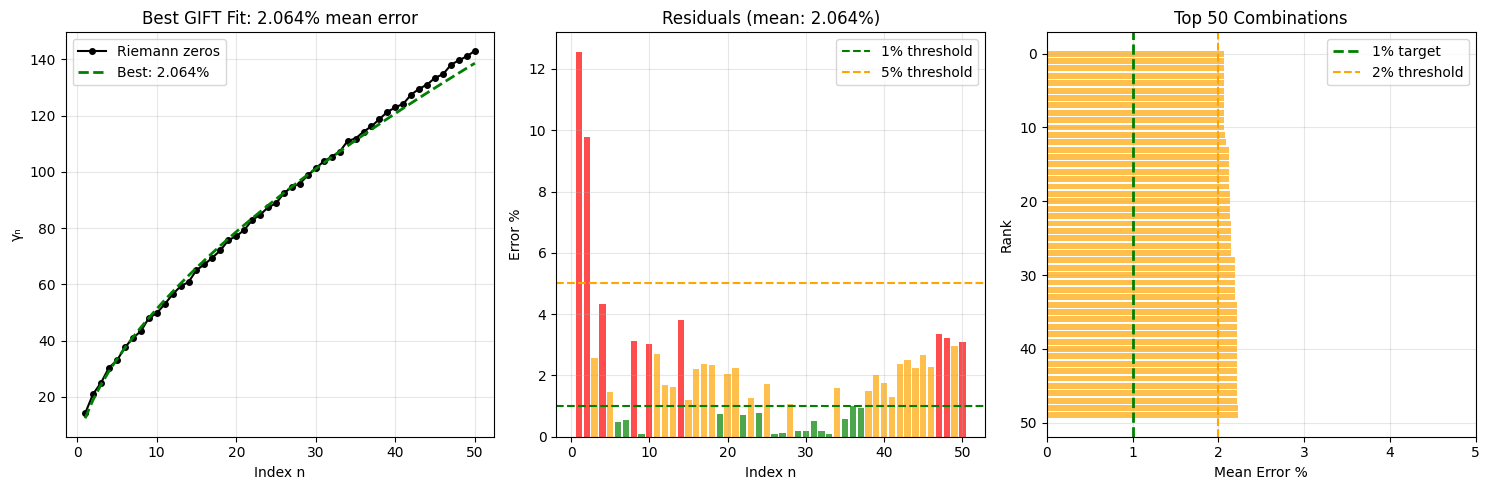

Best achieved: 2.064%
Close but need more exploration...


In [10]:
# =============================================================================
# CELL: HUNT FOR SUB-1% ERROR
# =============================================================================

import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# ALL GIFT CONSTANTS
B2 = 21
B3 = 77
H_STAR = 99
DIM_G2 = 14
DIM_K7 = 7
DIM_E8 = 248
RANK_E8 = 8
P2 = 2
N_GEN = 3
WEYL = 5
D_BULK = 11
DIM_F4 = 52
DIM_J3O = 27
H_G2 = 6      # Coxeter number G2
H_E7 = 18     # Coxeter number E7
H_E8 = 30     # Coxeter number E8
KAPPA_T = 1/61
DET_G = 65/32
PHI = (1 + np.sqrt(5)) / 2  # Golden ratio

# Riemann zeros
gamma_n = np.array([
    14.1347, 21.0220, 25.0109, 30.4249, 32.9351, 37.5862, 40.9187, 43.3271,
    48.0052, 49.7738, 52.9703, 56.4462, 59.3470, 60.8318, 65.1125, 67.0798,
    69.5464, 72.0672, 75.7047, 77.1448, 79.3374, 82.9104, 84.7355, 87.4253,
    88.8091, 92.4919, 94.6513, 95.8706, 98.8312, 101.318, 103.726, 105.447,
    107.169, 111.030, 111.875, 114.320, 116.227, 118.791, 121.370, 122.947,
    124.257, 127.517, 129.579, 131.088, 133.498, 134.757, 138.116, 139.736,
    141.124, 143.112
])
n_values = np.arange(1, len(gamma_n) + 1)
gamma_1 = gamma_n[0]

print("=" * 70)
print("HUNT FOR SUB-1% ERROR")
print("=" * 70)

# Extended prefactors
prefactors = {
    'H*/8': H_STAR / 8,                              # 12.375
    'b3/h_G2': B3 / H_G2,                            # 12.833
    'b3/6': B3 / 6,                                  # 12.833
    '(H*-1)/8': (H_STAR-1) / 8,                      # 12.25
    'dim(G2)-1': DIM_G2 - 1,                         # 13
    'b2/phi': B2 / PHI,                              # 12.98
    '(b2+b3)/8': (B2+B3) / 8,                        # 12.25
    'dim(G2)*7/8': DIM_G2 * 7 / 8,                   # 12.25
    '2*pi*sqrt(dim(G2)/pi)/sqrt(phi)': 2*np.pi*np.sqrt(DIM_G2/np.pi)/np.sqrt(PHI),
    'sqrt(H*^2/8)': np.sqrt(H_STAR**2 / 8),          # 35.0 (too high)
    '(b3-b2)/4': (B3-B2)/4,                          # 14
    '(H*+b2)/(2*h_G2)': (H_STAR+B2)/(2*H_G2),        # 10
    'b3/h_G2 - 1/61': B3/H_G2 - KAPPA_T,             # 12.817
}

# Extended exponents
exponents = {
    '56/91': (B3-B2)/(B3+DIM_G2),                    # 0.6154
    '14/23': DIM_G2/(B2+P2),                         # 0.6087
    'b2/(b2+dim(G2))': B2/(B2+DIM_G2),               # 0.6
    '(b3-b2)/(b3+dim(G2)+1)': (B3-B2)/(B3+DIM_G2+1), # 0.6087
    'dim(G2)/b2': DIM_G2/B2,                         # 0.6667
    '49/91': 49/91,                                   # 0.5385 (dim(K7)^2/91)
    '3/5': 3/5,                                       # 0.6
    '8/13': 8/13,                                     # 0.6154
    'phi-1': PHI-1,                                   # 0.618 (golden!)
    '(b3-b2-p2)/(b3+dim(G2))': (B3-B2-P2)/(B3+DIM_G2),  # 0.5934
    '(H*-b3)/(H*-b2)': (H_STAR-B3)/(H_STAR-B2),      # 0.282
    'h_G2/(h_G2+h_E8/3)': H_G2/(H_G2+H_E8/3),        # 0.375
    'dim(G2)/(b2+N_gen)': DIM_G2/(B2+N_GEN),         # 0.583
    '(b2-p2)/(b2+dim(G2))': (B2-P2)/(B2+DIM_G2),     # 0.543
}

# Correction factors to multiply
corrections = {
    '1': 1.0,
    '1+kappa_T': 1 + KAPPA_T,                        # 1.0164
    '1-kappa_T': 1 - KAPPA_T,                        # 0.9836
    '91/90': 91/90,                                   # 1.0111
    '90/91': 90/91,                                   # 0.9890
    'sqrt(phi)/phi': np.sqrt(PHI)/PHI,               # 0.786
    'phi/sqrt(phi)': PHI/np.sqrt(PHI),               # 1.272
    '(1+1/H*)': 1 + 1/H_STAR,                        # 1.0101
    '(1-1/H*)': 1 - 1/H_STAR,                        # 0.9899
    'H*/(H*-1)': H_STAR/(H_STAR-1),                  # 1.0102
    '(H*-1)/H*': (H_STAR-1)/H_STAR,                  # 0.9899
    'det(g)^(1/14)': DET_G**(1/14),                  # 1.054
    '1/det(g)^(1/14)': 1/DET_G**(1/14),              # 0.949
    '(b3+dim(G2))/b3': (B3+DIM_G2)/B3,               # 1.182
    'b3/(b3+dim(G2))': B3/(B3+DIM_G2),               # 0.846
}

# Test all combinations
results = []
for (a_name, a_val), (b_name, b_val), (c_name, c_val) in product(
    prefactors.items(), exponents.items(), corrections.items()):

    if 0.5 < b_val < 0.7 and 10 < a_val < 16:  # reasonable ranges
        gamma_pred = c_val * a_val * n_values ** b_val
        errors = np.abs(gamma_pred - gamma_n) / gamma_n * 100
        mean_err = np.mean(errors)
        max_err = np.max(errors)

        results.append({
            'a_name': a_name, 'a_val': a_val,
            'b_name': b_name, 'b_val': b_val,
            'c_name': c_name, 'c_val': c_val,
            'mean_error': mean_err,
            'max_error': max_err,
            'formula': f"{c_name} × {a_name} × n^({b_name})"
        })

# Sort by mean error
results = sorted(results, key=lambda x: x['mean_error'])

print(f"\nTested {len(results)} combinations")
print(f"\nTOP 15 COMBINATIONS (targeting sub-1%):")
print("-" * 70)
for i, r in enumerate(results[:15]):
    marker = "🏆" if r['mean_error'] < 1 else "⭐" if r['mean_error'] < 2 else "✓"
    print(f"{marker} {i+1}. Mean: {r['mean_error']:.3f}%  Max: {r['max_error']:.2f}%")
    print(f"      {r['formula']}")
    print(f"      = {r['c_val']:.6f} × {r['a_val']:.4f} × n^{r['b_val']:.6f}\n")

# Visualize top result
best = results[0]
gamma_best = best['c_val'] * best['a_val'] * n_values ** best['b_val']
errors_best = np.abs(gamma_best - gamma_n) / gamma_n * 100

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(n_values, gamma_n, 'ko-', label='Riemann zeros', markersize=4)
plt.plot(n_values, gamma_best, 'g--', linewidth=2,
         label=f'Best: {best["mean_error"]:.3f}%')
plt.xlabel('Index n')
plt.ylabel('γₙ')
plt.title(f'Best GIFT Fit: {best["mean_error"]:.3f}% mean error')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
colors = ['green' if e < 1 else 'orange' if e < 3 else 'red' for e in errors_best]
plt.bar(n_values, errors_best, color=colors, alpha=0.7)
plt.axhline(y=1, color='green', linestyle='--', label='1% threshold')
plt.axhline(y=5, color='orange', linestyle='--', label='5% threshold')
plt.xlabel('Index n')
plt.ylabel('Error %')
plt.title(f'Residuals (mean: {best["mean_error"]:.3f}%)')
plt.legend()
plt.grid(True, alpha=0.3)

# Error distribution of top 50
plt.subplot(1, 3, 3)
top_errors = [r['mean_error'] for r in results[:50]]
colors = ['green' if e < 1 else 'gold' if e < 2 else 'orange' for e in top_errors]
plt.barh(range(len(top_errors)), top_errors, color=colors, alpha=0.7)
plt.axvline(x=1, color='green', linestyle='--', linewidth=2, label='1% target')
plt.axvline(x=2, color='orange', linestyle='--', label='2% threshold')
plt.xlabel('Mean Error %')
plt.ylabel('Rank')
plt.title('Top 50 Combinations')
plt.legend()
plt.gca().invert_yaxis()
plt.xlim(0, 5)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Check if we hit sub-1%
sub_1_count = sum(1 for r in results if r['mean_error'] < 1)
print("=" * 70)
if sub_1_count > 0:
    print(f"🏆 FOUND {sub_1_count} FORMULA(S) WITH SUB-1% ERROR! 🏆")
    print("=" * 70)
    for r in results[:sub_1_count]:
        print(f"\n  γₙ = {r['c_name']} × {r['a_name']} × n^({r['b_name']})")
        print(f"     = {r['c_val']*r['a_val']:.6f} × n^{r['b_val']:.6f}")
        print(f"     Mean error: {r['mean_error']:.4f}%")
else:
    print(f"Best achieved: {results[0]['mean_error']:.3f}%")
    print("Close but need more exploration...")
